In [ ]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

konversi label ke polaritas

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/tarawithoutbudimann/GEMASTIQ2023/main/datamplabel.csv')
data = data.drop("Unnamed: 0", axis=1)
data

,Komentar,label,truncated_label,sentiment,score
0,mana ada gaji pppk ditransfer ke daerah kalau ...,NEGATIVE,how come pppk salaries are transferred to the ...,"[{'label': 'NEGATIVE', 'score': 0.996111810207...",0.996112
1,menpanrb dukung nadiem rekrut guru lewat marke...,NEGATIVE,b menpanrb supports Nadiem in recruiting teach...,"[{'label': 'NEGATIVE', 'score': 0.686894536018...",0.686895
2,marketplace guru ala nadiem makarim menguntun...,NEGATIVE,b marketplace for teachers in the style of Nad...,"[{'label': 'NEGATIVE', 'score': 0.984715461730...",0.984715
3,pgri marketplace guru adalah ide brilian namun...,POSITIVE,b pgri marketplace teacher is a brilliant idea...,"[{'label': 'POSITIVE', 'score': 0.996980845928...",0.996981
4,sudah dengar wacana marketplace guru mendikbud...,NEGATIVE,b ve heard about teacher marketplace Mendikbud...,"[{'label': 'NEGATIVE', 'score': 0.988574028015...",0.988574
...,...,...,...,...,...
1995,calon rektor unsri diusulkan ke menteri nadie...,POSITIVE,b the candidate for Chancellor of UNSRI was pr...,"[{'label': 'POSITIVE', 'score': 0.574981629848...",0.574982
1996,nitip,NEGATIVE,b nitip,"[{'label': 'NEGATIVE', 'score': 0.926035761833...",0.926036
1997,manusia tll tolonglah pak mentri cabut gelar p...,POSITIVE,b human tll please sir revoke the title of pro...,"[{'label': 'POSITIVE', 'score': 0.991081953048...",0.991082
1998,pak nadiem gajadi soalnya aku lolos,NEGATIVE,b pak nadiem didn t happen because I passed,"[{'label': 'NEGATIVE', 'score': 0.993142604827...",0.993143


In [ ]:
def convert(polarity):
  if polarity == "POSITIVE":
    return 1
  elif polarity == "NEGATIVE":
    return 0

In [ ]:
data['Polarity'] = data['label'].apply(convert)

In [ ]:
x = data['Komentar']
y = data['Polarity']

In [ ]:
# Drop rows with NaN values in the 'Komentar' column
data.dropna(subset=['Komentar'], inplace=True)
print(data['Komentar'].shape)
# Convert NaN values to empty string
data['Komentar'].fillna('', inplace=True)

# Vectorize the text
bow_transformer = CountVectorizer()
x = bow_transformer.fit_transform(data['Komentar'])
# Print the vectorized representation
print(x.toarray())
print('shape of sparse matrix:', x.shape)
print('amount of non-zero occurrences:', x.nnz)

# Save the CountVectorizer to disk
filename = 'count_vectorized.pkl'
pickle.dump(bow_transformer, open(filename, 'wb'))

# Apply TF-IDF transformation
tf_transform = TfidfTransformer(use_idf=False).fit(x)
x = tf_transform.transform(x)
print(x.shape)

# Save the TF-IDF transformer to disk
filename = 'tfidf_transform.pkl'
pickle.dump(tf_transform, open(filename, 'wb'))


(1998,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
shape of sparse matrix: (1998, 7619)
amount of non-zero occurrences: 39807
(1998, 7619)


In [ ]:
# vectorize
bow_transformer = CountVectorizer()
print(data['Komentar'].shape)
x = bow_transformer.fit_transform(data['Komentar'])
print(x.toarray())
print('shape of sparse matrix: ', x.shape)
print('amount of non-zero occurences: ', x.nnz)

# save count vectorized to disk
filename = 'count_vectorized.pkl'
pickle.dump(bow_transformer, open(filename, 'wb'))

# tfid transform
tf_transform = TfidfTransformer(use_idf=False).fit(x)
x = tf_transform.transform(x)
print(x.shape)

# safe tfid to disk
filename = 'tfid_transform.pkl'
pickle.dump(tf_transform, open(filename, 'wb'))


(1998,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
shape of sparse matrix:  (1998, 7619)
amount of non-zero occurences:  39807
(1998, 7619)


In [ ]:
density = (100.0*x.nnz/(x.shape[0]*x.shape[1]))
print('Density: {}'.format(density))

Density: 0.2614965667859748


In [ ]:
data

,Komentar,label,truncated_label,sentiment,score,Polarity
0,mana ada gaji pppk ditransfer ke daerah kalau ...,NEGATIVE,how come pppk salaries are transferred to the ...,"[{'label': 'NEGATIVE', 'score': 0.996111810207...",0.996112,0
1,menpanrb dukung nadiem rekrut guru lewat marke...,NEGATIVE,b menpanrb supports Nadiem in recruiting teach...,"[{'label': 'NEGATIVE', 'score': 0.686894536018...",0.686895,0
2,marketplace guru ala nadiem makarim menguntun...,NEGATIVE,b marketplace for teachers in the style of Nad...,"[{'label': 'NEGATIVE', 'score': 0.984715461730...",0.984715,0
3,pgri marketplace guru adalah ide brilian namun...,POSITIVE,b pgri marketplace teacher is a brilliant idea...,"[{'label': 'POSITIVE', 'score': 0.996980845928...",0.996981,1
4,sudah dengar wacana marketplace guru mendikbud...,NEGATIVE,b ve heard about teacher marketplace Mendikbud...,"[{'label': 'NEGATIVE', 'score': 0.988574028015...",0.988574,0
...,...,...,...,...,...,...
1995,calon rektor unsri diusulkan ke menteri nadie...,POSITIVE,b the candidate for Chancellor of UNSRI was pr...,"[{'label': 'POSITIVE', 'score': 0.574981629848...",0.574982,1
1996,nitip,NEGATIVE,b nitip,"[{'label': 'NEGATIVE', 'score': 0.926035761833...",0.926036,0
1997,manusia tll tolonglah pak mentri cabut gelar p...,POSITIVE,b human tll please sir revoke the title of pro...,"[{'label': 'POSITIVE', 'score': 0.991081953048...",0.991082,1
1998,pak nadiem gajadi soalnya aku lolos,NEGATIVE,b pak nadiem didn t happen because I passed,"[{'label': 'NEGATIVE', 'score': 0.993142604827...",0.993143,0


In [ ]:
data['Polarity'].fillna('0', inplace=True)
data['label'].fillna('Negatif', inplace=True)
data['Komentar'].fillna('Buruk', inplace=True)

In [ ]:
# Drop rows with NaN values in the 'Komentar' column
data.dropna(subset=['Komentar'], inplace=True)

# Convert NaN values to empty string
data['Komentar'].fillna('', inplace=True)

# Separate features and target
X = data['Komentar']
y = data['Polarity']

# Vectorize the text
bow_transformer = CountVectorizer()
X = bow_transformer.fit_transform(X)

# Apply TF-IDF transformation
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)

# Save the vectorizers to disk
vectorizer_filename = 'vectorizer.pkl'
pickle.dump(bow_transformer, open(vectorizer_filename, 'wb'))
tfidf_transformer_filename = 'tfidf_transformer.pkl'
pickle.dump(tf_transform, open(tfidf_transformer_filename, 'wb'))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Predict the target on the test set
preds = nb.predict(X_test)

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print(x_test)

In [ ]:
# classifier data
nb = MultinomialNB()
nb.fit(x_train, y_train)
preds = nb.predict(x_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       272
           1       0.73      0.31      0.44       128

    accuracy                           0.74       400
   macro avg       0.74      0.63      0.64       400
weighted avg       0.74      0.74      0.71       400



In [ ]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
with open ('classification.csv', 'w') as f:
  for line in s:
    f.write(line)

In [ ]:
print(accuracy_score(y_test, preds))

0.7425


In [ ]:
accuracy = accuracy_score(y_test, preds)
a = np.asarray([accuracy])
np.savetxt('accuracy.csv', a, delimiter=',', fmt='%s')

In [ ]:
data

,Komentar,label,truncated_label,sentiment,score,Polarity
0,mana ada gaji pppk ditransfer ke daerah kalau ...,NEGATIVE,how come pppk salaries are transferred to the ...,"[{'label': 'NEGATIVE', 'score': 0.996111810207...",0.996112,0
1,menpanrb dukung nadiem rekrut guru lewat marke...,NEGATIVE,b menpanrb supports Nadiem in recruiting teach...,"[{'label': 'NEGATIVE', 'score': 0.686894536018...",0.686895,0
2,marketplace guru ala nadiem makarim menguntun...,NEGATIVE,b marketplace for teachers in the style of Nad...,"[{'label': 'NEGATIVE', 'score': 0.984715461730...",0.984715,0
3,pgri marketplace guru adalah ide brilian namun...,POSITIVE,b pgri marketplace teacher is a brilliant idea...,"[{'label': 'POSITIVE', 'score': 0.996980845928...",0.996981,1
4,sudah dengar wacana marketplace guru mendikbud...,NEGATIVE,b ve heard about teacher marketplace Mendikbud...,"[{'label': 'NEGATIVE', 'score': 0.988574028015...",0.988574,0
...,...,...,...,...,...,...
1995,calon rektor unsri diusulkan ke menteri nadie...,POSITIVE,b the candidate for Chancellor of UNSRI was pr...,"[{'label': 'POSITIVE', 'score': 0.574981629848...",0.574982,1
1996,nitip,NEGATIVE,b nitip,"[{'label': 'NEGATIVE', 'score': 0.926035761833...",0.926036,0
1997,manusia tll tolonglah pak mentri cabut gelar p...,POSITIVE,b human tll please sir revoke the title of pro...,"[{'label': 'POSITIVE', 'score': 0.991081953048...",0.991082,1
1998,pak nadiem gajadi soalnya aku lolos,NEGATIVE,b pak nadiem didn t happen because I passed,"[{'label': 'NEGATIVE', 'score': 0.993142604827...",0.993143,0


In [ ]:
final = data
final.to_csv('hasil_analisis.csv')

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# save model
filename= 'modelanalisis.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load model from disk
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(x_test, y_test)
print(result)

0.76


In [ ]:
from sklearn.metrics import confusion_matrix


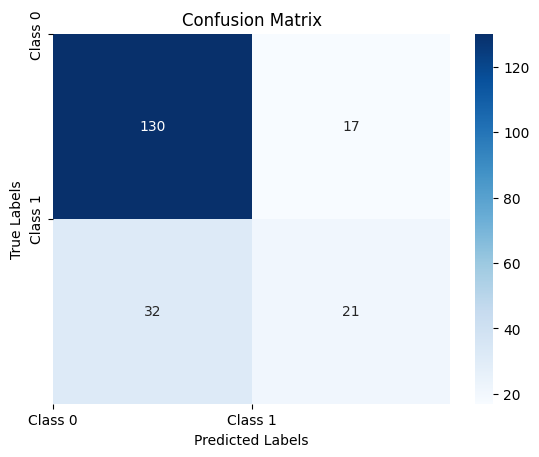

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, preds)

# Create heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

# Show plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Pembagian data uji dan pelatihan dengan rasio 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4, random_state=42)
print("Jumlah data pelatihan (60:40):", x_train.shape[0])
print("Jumlah data pengujian (60:40):", x_test.shape[0])

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, preds)
print("Accuracy (60:40):", accuracy)

# Pembagian data uji dan pelatihan dengan rasio 75:25
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=42)
print("Jumlah data pelatihan (75:25):", x_train.shape[0])
print("Jumlah data pengujian (75:25):", x_test.shape[0])

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, preds)
print("Accuracy (75:25):", accuracy)

# Pembagian data uji dan pelatihan dengan rasio 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
print("Jumlah data pelatihan (80:20):", x_train.shape[0])
print("Jumlah data pengujian (80:20):", x_test.shape[0])

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, preds)
print("Accuracy (80:20):", accuracy)

# Pembagian data uji dan pelatihan dengan rasio 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=42)
print("Jumlah data pelatihan (90:10):", x_train.shape[0])
print("Jumlah data pengujian (90:10):", x_test.shape[0])

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, preds)
print("Accuracy (90:10):", accuracy)



Jumlah data pelatihan (60:40): 1198
Jumlah data pengujian (60:40): 800
Accuracy (60:40): 0.73
Jumlah data pelatihan (75:25): 1498
Jumlah data pengujian (75:25): 500
Accuracy (75:25): 0.736
Jumlah data pelatihan (80:20): 1598
Jumlah data pengujian (80:20): 400
Accuracy (80:20): 0.74
Jumlah data pelatihan (90:10): 1798
Jumlah data pengujian (90:10): 200
Accuracy (90:10): 0.755


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Pembagian data uji dan pelatihan dengan rasio 60:40
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung metrik menggunakan classification_report
report = classification_report(y_test, preds)
print("Classification Report (60:40):\n", report)

# Pembagian data uji dan pelatihan dengan rasio 75:25
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung metrik menggunakan classification_report
report = classification_report(y_test, preds)
print("Classification Report (75:25):\n", report)

# Pembagian data uji dan pelatihan dengan rasio 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung metrik menggunakan classification_report
report = classification_report(y_test, preds)
print("Classification Report (80:20):\n", report)

# Pembagian data uji dan pelatihan dengan rasio 90:10
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, test_size=0.1, random_state=42)

# Inisialisasi dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

# Prediksi pada data uji
preds = nb.predict(x_test)

# Menghitung metrik menggunakan classification_report
report = classification_report(y_test, preds)
print("Classification Report (90:10):\n", report)


Classification Report (60:40):
               precision    recall  f1-score   support

           0       0.73      0.95      0.83       547
           1       0.71      0.25      0.37       253

    accuracy                           0.73       800
   macro avg       0.72      0.60      0.60       800
weighted avg       0.72      0.73      0.68       800

Classification Report (75:25):
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       355
           1       0.59      0.30      0.39       145

    accuracy                           0.74       500
   macro avg       0.68      0.61      0.61       500
weighted avg       0.71      0.74      0.70       500

Classification Report (80:20):
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       284
           1       0.59      0.34      0.43       116

    accuracy                           0.74       400
   macro avg       0.68      0.6

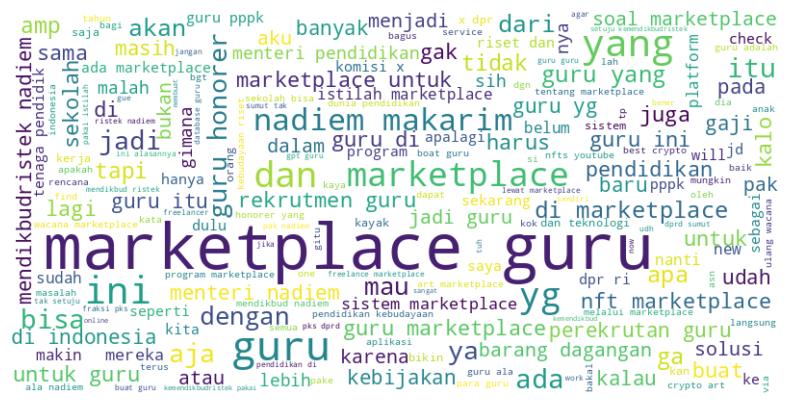

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membaca dataset (misalnya dalam format CSV)

# Menggabungkan semua teks dari dataset menjadi satu string
text = ' '.join(data['Komentar'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


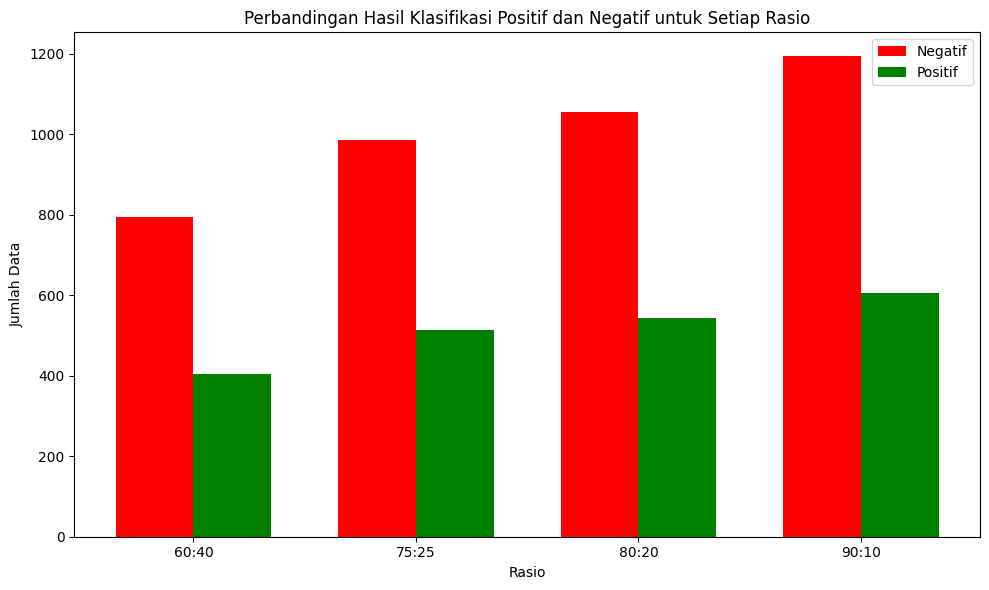

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data Sentimen Negatif
sentimen_negatif = [sentimen_count_6040[0], sentimen_count_7525[0], sentimen_count_8020[0], sentimen_count_9010[0]]
# Data Sentimen Positif
sentimen_positif = [sentimen_count_6040[1], sentimen_count_7525[1], sentimen_count_8020[1], sentimen_count_9010[1]]

# Menentukan posisi grup bar
bar_width = 0.35
index = np.arange(4)

# Membuat bar chart ganda
plt.figure(figsize=(10, 6))
plt.bar(index, sentimen_negatif, bar_width, label='Negatif', color='red')
plt.bar(index + bar_width, sentimen_positif, bar_width, label='Positif', color='green')

plt.xlabel('Rasio')
plt.ylabel('Jumlah Data')
plt.title('Perbandingan Hasil Klasifikasi Positif dan Negatif untuk Setiap Rasio')

plt.xticks(index + bar_width/2, ['60:40', '75:25', '80:20', '90:10'])
plt.legend()

plt.tight_layout()
plt.show()


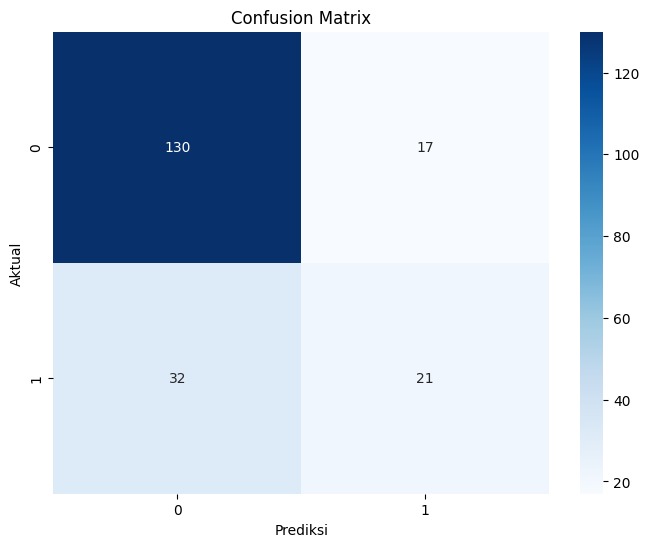

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Menghitung confusion matrix
cm = confusion_matrix(y_test, preds)

# Membuat heatmap confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Prediksi')
plt.ylabel('Aktual')

# Menampilkan judul grafik
plt.title('Confusion Matrix')

plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

# Membaca dataset (misalnya dalam format CSV)

# Mengambil kolom prediksi dan kolom ground truth
y_pred = data['Komentar']
y_true = data['label']

# Menghitung precision, recall, dan F1-Score untuk setiap label
positif_precision = precision_score(y_true, y_pred, pos_label='Positif')
positif_recall = recall_score(y_true, y_pred, pos_label='Positif')
positif_f1 = f1_score(y_true, y_pred, pos_label='Positif')

negatif_precision = precision_score(y_true, y_pred, pos_label='Negatif')
negatif_recall = recall_score(y_true, y_pred, pos_label='Negatif')
negatif_f1 = f1_score(y_true, y_pred, pos_label='Negatif')

netral_precision = precision_score(y_true, y_pred, pos_label='Netral')
netral_recall = recall_score(y_true, y_pred, pos_label='Netral')
netral_f1 = f1_score(y_true, y_pred, pos_label='Netral')

# Menghitung rata-rata precision, recall, dan F1-Score
rata_precision = (positif_precision + negatif_precision + netral_precision) / 3
rata_recall = (positif_recall + negatif_recall + netral_recall) / 3
rata_f1 = (positif_f1 + negatif_f1 + netral_f1) / 3

# Menampilkan hasil perhitungan
print("Rata-rata Precision:", rata_precision)
print("Rata-rata Recall:", rata_recall)
print("Rata-rata F1-Score:", rata_f1)


ValueError: ignored